In [43]:
import pandas as pd
import seaborn as sns

In [4]:
df=pd.read_csv('BlackFriday.csv')

In [5]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [10]:
df.isnull().sum() #null values further we'll remove these coloumn

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [12]:
del df['Product_Category_2']
del df['Product_Category_3']   #deleting non neccesary coloumn

In [14]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [16]:
df['User_ID'].nunique() #unique users (total unique user)

5891

In [18]:
df['Product_ID'].nunique() #unique products

3623

In [20]:
# better way to do 

for column in df.columns:
    print(column,df[column].nunique())

User_ID 5891
Product_ID 3623
Gender 2
Age 7
Occupation 21
City_Category 3
Stay_In_Current_City_Years 5
Marital_Status 2
Product_Category_1 18
Purchase 17959


# Analysing Gender

In [23]:
#ratio to male to female

<Axes: title={'center': 'Gender_Ratio'}>

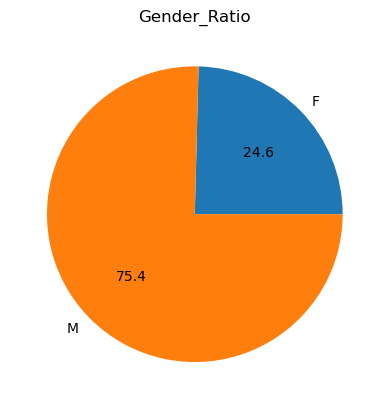

In [25]:
# better approach 
df.groupby('Gender').size().plot(kind='pie',autopct='%.1f',title="Gender_Ratio")

# Age & Marital Status

<Axes: title={'center': 'Purchase Distribution by Age'}, xlabel='Age'>

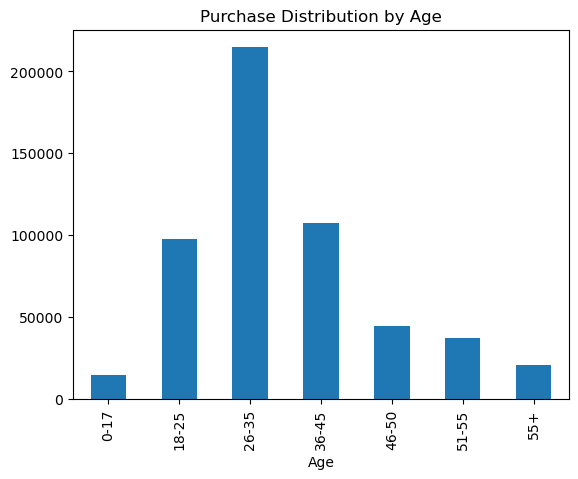

In [28]:
df.groupby('Age').size().plot(kind='bar',title='Purchase Distribution by Age')

In [30]:
lst=[]
for i in df['Age'].unique():
    lst.append([i,df[df['Age']==i]['Product_ID'].nunique()])
data=pd.DataFrame(lst,columns=['Age','Products']) 
# This tells you how many unique products were purchased by each age group.

<Axes: xlabel='Age'>

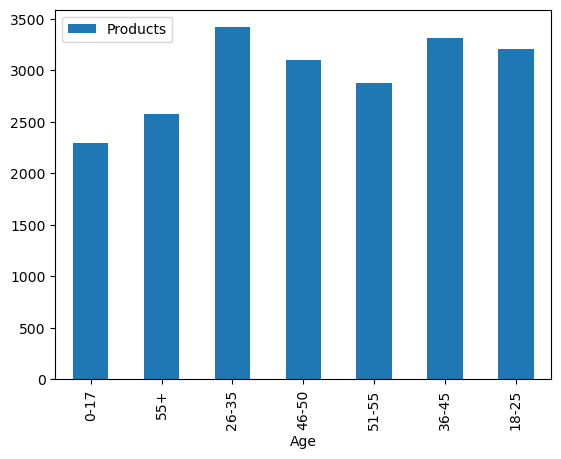

In [32]:
data.plot.bar(x='Age')

<Axes: title={'center': 'Amount Spent by Age'}, xlabel='Age'>

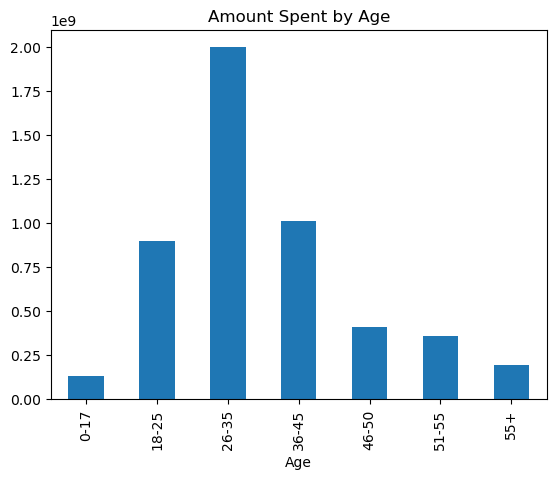

In [34]:
df.groupby('Age')['Purchase'].sum().plot(kind='bar', title='Amount Spent by Age')


<Axes: >

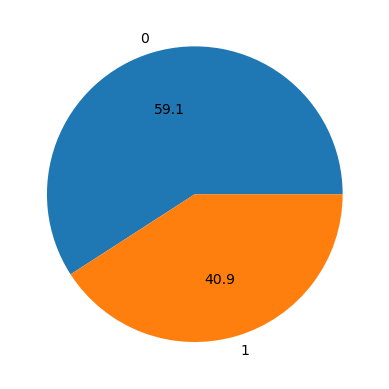

In [40]:
df.groupby('Marital_Status').size().plot(kind='pie', autopct='%.1f')

# Multi Coloumn Analysis

<Axes: xlabel='Age', ylabel='count'>

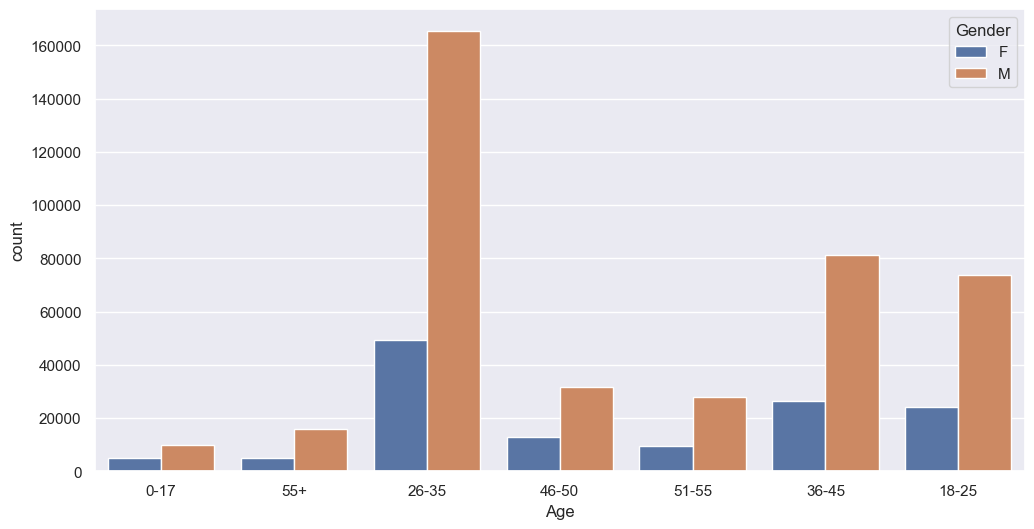

In [47]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Age', hue='Gender',data=df)

<Axes: xlabel='Gender', ylabel='count'>

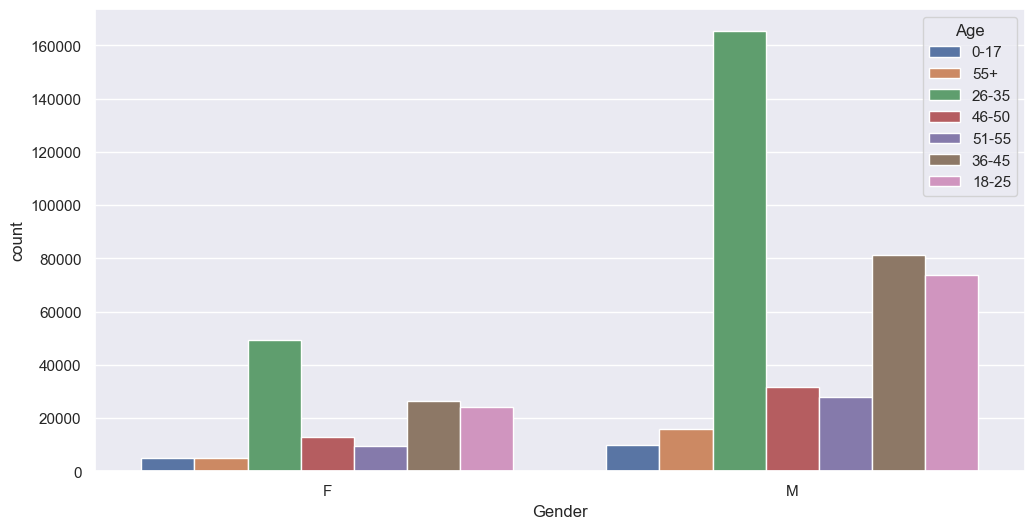

In [49]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Gender', hue='Age',data=df)

<Axes: >

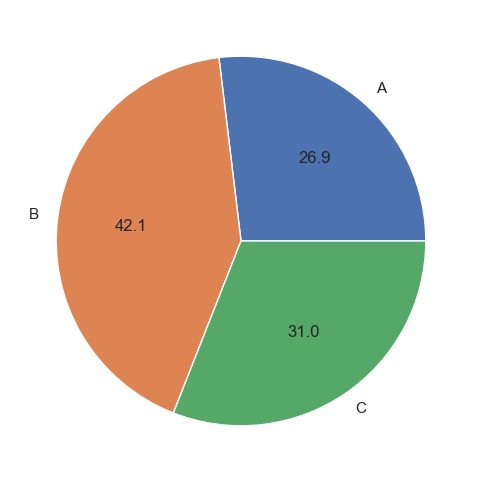

In [53]:
df.groupby('City_Category').size().plot(kind='pie',autopct='%.1f')